In [1]:
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
from IPython import display

In [2]:
## Parameters
dt = 1 # time step
n_agents = 4 # number of agents
k = 0.1 # K
w_mul = 0.01 # w multiplier
sim_time = 8000. # sumulation time (in seconds)
n_iterations = int(sim_time / dt)

In [3]:
## Init vals
#ang_speed = w_mul * np.random.rand(n_agents)    # w
#ang_speed = w_mul * np.arange(n_agents) / n_agents
ang_speed = w_mul 
ang_0 = 2 * np.pi * np.random.rand(n_agents)    # theta
print(ang_speed)
print(ang_0)

0.01
[1.7718205  3.45489325 4.24442186 3.62907979]


In [4]:
## Adjacency matrix
# assume n_agents = 5
cls1 = np.ones((2, 2))
cls2 = np.ones((2, 2))
adj_background = 0.1 * np.ones((4, 4))
adj = spla.block_diag(cls1, cls2)
print(adj)

[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


In [5]:
## Progress recording
angles = np.zeros((n_agents, n_iterations))
time_vals = np.linspace(1., sim_time, n_iterations)

In [6]:
## Start loop
ang = ang_0
for i in range(n_iterations):
    angles[:, i] = ang
    
    # loss grad
    ang_mat = np.repeat(ang.reshape(n_agents, 1), n_agents, axis=1)
    neigh = np.cos(ang_mat.T)
    for i in range(n_agents):
        neigh[i][i] = 0
    diffs = -neigh
    diffs_adj = np.multiply(diffs, adj)
    sums_diffs = np.sum(diffs_adj, axis=1)
    
    ang = ang + dt * (ang_speed - (k / n_agents) * sums_diffs)

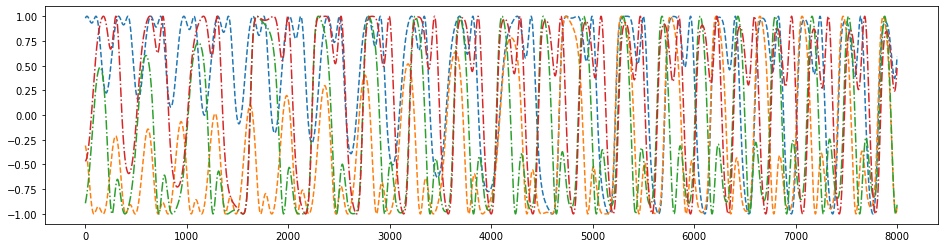

In [7]:
## Plot result
angles_sin = np.sin(angles)
plt.figure(figsize=(16, 4))
for i in range(n_agents // 2):
    plt.plot(time_vals, angles_sin[i], '--')
for i in range(n_agents // 2, n_agents):
    plt.plot(time_vals, angles_sin[i], '-.')
display.clear_output(wait=True)
plt.show()

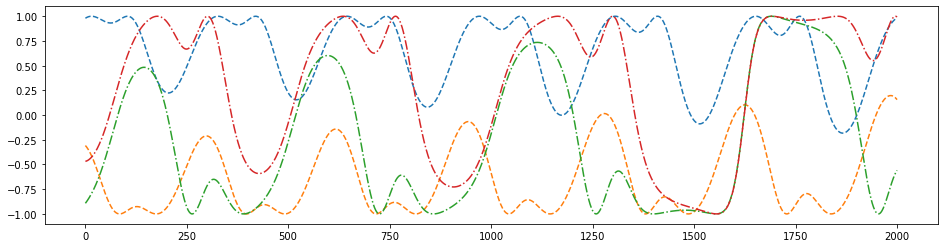

In [8]:
max_perc = 0.25
max_val = int(max_perc * n_iterations)
plt.figure(figsize=(16, 4))
for i in range(n_agents // 2):
    plt.plot(time_vals[0:max_val], angles_sin[i][0:max_val], '--')
for i in range(n_agents // 2, n_agents):
    plt.plot(time_vals[0:max_val], angles_sin[i][0:max_val], '-.')
display.clear_output(wait=True)
plt.show()